# cdasws Example Jupyter Notebook
This [Jupyter notebook](https://jupyter.org) demonstrates using the [cdasws](https://pypi.org/project/cdasws) Python package to access [NetCDF](https://www.unidata.ucar.edu/software/netcdf/) data from [cdaweb](https://cdaweb.gsfc.nasa.gov) with the data returned in the [xarray.Dataset](https://docs.xarray.dev/en/stable/generated/xarray.Dataset.html).  This notebook contains the following sections:

1. [Prerequisites](#Prerequisites)
2. [Setup](#Setup)
3. [Get Observatory Groups](#Get-Observatory-Groups)
4. [Get Datasets](#Get-Datasets)
5. [Get Dataset Variables](#Get-Dataset-Variables)
6. [Get Data](#Get-Data)
7. [Display Metadata](#Display-Metadata)
8. [Plot Values](#Plot-Values)
9. [Additional Documentation](#Additional-Documentation)

**Notes**: 
1. This example only depends upon pure Python modules and does not require modules that depend upon non-Python code (such as spacepy and pycdf).
2. The use of the dataRepresentation keyword parameter below is only necessary if you also have [spacepy](https://pypi.org/project/spacepy) installed.
3. It also is possible to have the data returned in a [SpasePy data model](https://spacepy.github.io/datamodel.html) instead of an xarrayDataset.

## Prerequisites
Install the prerequisite software from the [Python Package Index](https://pypi.org/) if it is not already installed.

In [12]:
#%pip install xarray
#%pip install cdflib
#%pip install cdasws

## Setup
Execute some preliminary code that is necessary before the code that follows.

In [13]:
from cdasws import CdasWs
from cdasws.datarepresentation import DataRepresentation as dr
import matplotlib.pyplot as plt
cdas = CdasWs()

## Get Observatory Groups
The following code demonstrates how to get the available observatory groups.

In [15]:
obs_groups = cdas.get_observatory_groups()
for index, obs_group in enumerate(obs_groups):
    obs_group_name = obs_group['Name']
    if 'ICON' in obs_group_name:
        print(obs_group_name)

ICON


## Get Datasets
The following code demontrates how to get a list of datasets.

In [16]:
datasets = cdas.get_datasets(observatoryGroup='ICON')
for index, dataset in enumerate(datasets):
    print(dataset['Id'], dataset['Label'])

ICON_L2-1_MIGHTI-A_LOS-WIND-GREEN Michelson Interferometer for Global High-resolution Thermospheric Imaging (MIGHTI) Sensor A: Line-of-sight Wind Profiles - T. J. Immel (UC Berkeley>SSL)
ICON_L2-1_MIGHTI-A_LOS-WIND-RED Michelson Interferometer for Global High-resolution Thermospheric Imaging (MIGHTI) Sensor A: Line-of-sight Wind Profiles - T. J. Immel (UC Berkeley>SSL)
ICON_L2-1_MIGHTI-B_LOS-WIND-GREEN Michelson Interferometer for Global High-resolution Thermospheric Imaging (MIGHTI) Sensor B - Line-of-sight Wind Profiles - T. J. Immel (UC Berkeley>SSL)
ICON_L2-1_MIGHTI-B_LOS-WIND-RED Michelson Interferometer for Global High-resolution Thermospheric Imaging (MIGHTI) Sensor B - Line-of-sight Wind Profiles - T. J. Immel (UC Berkeley>SSL)
ICON_L2-2_MIGHTI_VECTOR-WIND-GREEN MIGHTI - Cardinal Vector Winds - T. J. Immel (UC Berkeley>SSL)
ICON_L2-2_MIGHTI_VECTOR-WIND-RED MIGHTI - Cardinal Vector Winds - T. J. Immel (UC Berkeley>SSL)
ICON_L2-3_MIGHTI-A_TEMPERATURE ICON MIGHTI-A Level 2.3 Retri

## Get Dataset Variables
The following code demonstrates how to get a dataset's variables.

In [17]:
ds_id = 'ICON_L2-4_FUV_DAY'
var_names = []
variables = cdas.get_variables(ds_id)
for variable in variables:
    var_name = variable['Name']
    var_names.append(var_name)
    print(var_name, variable['LongDescription'])

ICON_L24_1356_Emission Disk short wave emission
ICON_L24_Ap Ap used in retreival
ICON_L24_Disk_LOS_Zen_Angle Retrieved disk LOS zenith angle
ICON_L24_Disk_Latitude Retrieved disk latitude
ICON_L24_Disk_Longitude Retrieved disk longitude
ICON_L24_Disk_ON2 Retrieved disk column O/N2
ICON_L24_Disk_SZA Retrieved disk SZA
ICON_L24_Disk_Sigma_ON2 Retrieved disk column O/N2 uncertainty
ICON_L24_LBH_Emission Disk long wave emission


## Get Data
The following code demonstrates how to get NetCDF data 
from the [ICON_L2-4_FUV_DAY dataset](https://cdaweb.gsfc.nasa.gov/misc/NotesI.html#ICON_L2-4_FUV_DAY).

In [18]:
data = cdas.get_data(ds_id, var_names,
                     '2022-11-24T23:00:00Z', '2022-11-24T23:05:00Z',
                     dataRepresentation = DataRepresentation.XARRAY)[1]
print(data)

<xarray.Dataset>
Dimensions:                      (Epoch_cdf: 24, record0: 6951)
Coordinates:
  * Epoch_cdf                    (Epoch_cdf) datetime64[ns] 2022-11-24T23:00:...
Dimensions without coordinates: record0
Data variables:
    time_base                    datetime64[ns] 1970-01-01
    ICON_L24_1356_Emission       (Epoch_cdf) float32 3.69e+03 ... 3.435e+03
    ICON_L24_Ap                  (Epoch_cdf) float32 12.0 12.0 ... 12.0 12.0
    ICON_L24_Disk_LOS_Zen_Angle  (Epoch_cdf) float32 119.9 119.9 ... 119.9 119.9
    ICON_L24_Disk_Latitude       (Epoch_cdf) float32 -19.67 -19.66 ... -18.34
    ICON_L24_Disk_Longitude      (Epoch_cdf) float32 200.5 201.3 ... 217.1 217.8
    ICON_L24_Disk_ON2            (Epoch_cdf) float32 0.5691 0.5892 ... 0.5599
    ICON_L24_Disk_SZA            (Epoch_cdf) float32 8.413 9.165 ... 25.11 25.87
    ICON_L24_Disk_Sigma_ON2      (Epoch_cdf) float32 0.01592 0.0184 ... 0.02127
    ICON_L24_LBH_Emission        (Epoch_cdf) float32 1.038e+03 ... 964.8
    E

## Display Metadata

The following code displays metadata for the ICON_L24_Disk_SZA variable, do

In [19]:
print(data.ICON_L24_Disk_SZA)

<xarray.DataArray 'ICON_L24_Disk_SZA' (Epoch_cdf: 24)>
array([ 8.413165,  9.165311,  9.919736, 10.674797, 11.431073, 12.187651,
       12.945468, 13.703261, 14.462048, 15.220608, 15.980153, 16.739532,
       17.499659, 18.259481, 19.019903, 19.780228, 20.540913, 21.30163 ,
       22.062748, 22.823668, 23.585054, 24.345064, 25.106302, 25.867178],
      dtype=float32)
Coordinates:
  * Epoch_cdf  (Epoch_cdf) datetime64[ns] 2022-11-24T23:00:10.767000 ... 2022...
Attributes:
    FIELDNAM:         Retrieved disk SZA
    NC_DIMENSIONS_V:  Epoch
    NC_DEFLATE:       [6]
    NC_SHUFFLE:       true
    NC_STORAGE:       chunked
    NC_CHUNKSIZES:    [7013]
    CATDESC:          Retrieved disk SZA
    DEPEND_0:         Epoch_cdf
    DISPLAY_TYPE:     time_series
    FILLVAL:          [-999.]
    UNITS:            Degrees
    VALIDMAX:         [180.]
    VALIDMIN:         [0.]
    VAR_NOTES:        Solar zenith angle corresponding to disk retrieval
    VAR_TYPE:         data
    NC_STRINGS_V:    

## Plot Values

The following code plots the ICON_L24_Disk_SZA variable's values using the label values from the metadata.

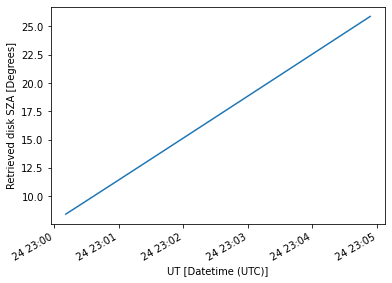

In [20]:
data['ICON_L24_Disk_SZA'].plot()

## Additional Documentation

View the [cdasws API](https://cdaweb.gsfc.nasa.gov/WebServices/REST/py/cdasws/) for additional functions.  Additional [notebook examples](https://cdaweb.gsfc.nasa.gov/WebServices/REST/#Jupyter_Notebook_Examples) are also available.